# 1. 
# 用 @trace 來 modifies fib() => 來trace function calls的steps

In [8]:
# Modify the function, trace, so that when it is used as a decorator it gives a trace as shown in the previous video. You can 
# test your function by applying the decorator to the provided fibonnaci function.
#
# Note: Running this in the browser's IDE will not display the indentations.

from functools import update_wrapper

def decorator(d):                                           #有沒有decorator都沒差，有decorator，modified function's name will be changed 

    def _d(fn):
        
        return update_wrapper(d(fn), fn)
    
    update_wrapper(_d, d)
    
    return _d

@decorator
def trace(f):                                                              #如圖         
    
    indent = '   '
    
    def _f(*args):
        
        signature = '%s(%s)' % ( f.__name__,  ', '.join(map(repr, args)))  #用repr()把args轉成string，然後map()起來 => 然後放入指定位置
        
        #print (''.join(map(repr, args)))    => 其實好像不用 "," => 也可以

        print ('%s--> %s' % (trace.level*indent, signature))               #將trace.level*indent & signature放入指定位置
        
        trace.level += 1
        
        try:
            
            result = f(*args)
            
            print ('%s<-- %s == %s' % ((trace.level-1)*indent, signature, result))  #將trace.level*indent-1 (因為上面level已經先+1)  &  signature  &  result 放入指定位置
            
        finally:
            
            trace.level -= 1    #如果到此步驟，代表上述已完成 => 要往回return => level-1
            
        return result

    trace.level = 0
    
    return _f

@trace
def fib(n):
    
    return 1 if n <= 1 else fib(n-1) + fib(n-2)

print (fib(6))

--> fib(6)
   --> fib(5)
      --> fib(4)
         --> fib(3)
            --> fib(2)
               --> fib(1)
               <-- fib(1) == 1
               --> fib(0)
               <-- fib(0) == 1
            <-- fib(2) == 2
            --> fib(1)
            <-- fib(1) == 1
         <-- fib(3) == 3
         --> fib(2)
            --> fib(1)
            <-- fib(1) == 1
            --> fib(0)
            <-- fib(0) == 1
         <-- fib(2) == 2
      <-- fib(4) == 5
      --> fib(3)
         --> fib(2)
            --> fib(1)
            <-- fib(1) == 1
            --> fib(0)
            <-- fib(0) == 1
         <-- fib(2) == 2
         --> fib(1)
         <-- fib(1) == 1
      <-- fib(3) == 3
   <-- fib(5) == 8
   --> fib(4)
      --> fib(3)
         --> fib(2)
            --> fib(1)
            <-- fib(1) == 1
            --> fib(0)
            <-- fib(0) == 1
         <-- fib(2) == 2
         --> fib(1)
         <-- fib(1) == 1
      <-- fib(3) == 3
      --> fib(2)
         --> fib

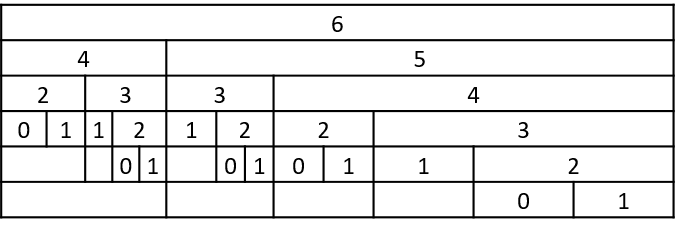

In [10]:
from IPython.display import Image

Image("Desktop\Step1.png")

# 2.
# 用 @trace 來 modifies fib() => 來trace function calls的steps
# 且用@memo 來 modifies fib() 
# => function calls的次數大幅下降

In [4]:
from functools import update_wrapper

def decorator(d):

    def _d(fn):
        
        return update_wrapper(d(fn), fn)
    
    update_wrapper(_d, d)
    
    return _d

@decorator
def trace(f):
    
    indent = '   '
    
    def _f(*args):
        
        signature = '%s(%s)' % (f.__name__,  ', '.join(map(repr, args)))

        print ('%s--> %s' % (trace.level*indent, signature))
        
        trace.level += 1
        
        try:
            
            result = f(*args)
            
            print ('%s<-- %s == %s' % ((trace.level-1)*indent, signature, result))
            
        finally:
            
            trace.level -= 1
            
        return result

    trace.level = 0
    
    return _f

def memo(f):

    cache = {}
    
    def _f(*args):
        
        try:
            
            return cache[args]
        
        except KeyError:
            
            cache[args] = result = f(*args)
            
            return result
        
        except TyprError:
            
            return f(args)
        
    return _f     

@trace
@memo
def fib(n):
    
    return 1 if n <= 1 else fib(n-1) + fib(n-2)

print (fib(6))

--> _f(6)
   --> _f(5)
      --> _f(4)
         --> _f(3)
            --> _f(2)
               --> _f(1)
               <-- _f(1) == 1
               --> _f(0)
               <-- _f(0) == 1
            <-- _f(2) == 2
            --> _f(1)
            <-- _f(1) == 1
         <-- _f(3) == 3
         --> _f(2)
         <-- _f(2) == 2
      <-- _f(4) == 5
      --> _f(3)
      <-- _f(3) == 3
   <-- _f(5) == 8
   --> _f(4)
   <-- _f(4) == 5
<-- _f(6) == 13
13
